<h2 id="50-データの入手整形">50. データの入手・整形</h2>
<p><a href="https://archive.ics.uci.edu/ml/datasets/News+Aggregator">News Aggregator Data Set</a>をダウンロードし、以下の要領で学習データ（<code class="language-plaintext highlighter-rouge">train.txt</code>），検証データ（<code class="language-plaintext highlighter-rouge">valid.txt</code>），評価データ（<code class="language-plaintext highlighter-rouge">test.txt</code>）を作成せよ．</p>
<ol>
<li>ダウンロードしたzipファイルを解凍し，<code class="language-plaintext highlighter-rouge">readme.txt</code>の説明を読む．</li>
<li>情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．</li>
<li>抽出された事例をランダムに並び替える．</li>
<li>抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれ<code class="language-plaintext highlighter-rouge">train.txt</code>，<code class="language-plaintext highlighter-rouge">valid.txt</code>，<code class="language-plaintext highlighter-rouge">test.txt</code>というファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．</li>
</ol>
<p>学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．</p>


In [155]:
!unzip -y data/NewsAggregatorDataset.zip

UnZip 6.00 of 20 April 2009, by Info-ZIP.  Maintained by C. Spieler.  Send
bug reports using http://www.info-zip.org/zip-bug.html; see README for details.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files

In [156]:
import pandas as pd
# csvファイルを読み込む
df = pd.read_table('data/newsCorpora.csv', header=None, sep='\\t', engine='python')
df.columns = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
# 先頭5つ表示
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [157]:
# PUBLISHERが特定の行のみを取り出す
publishers = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
daily_mails = df[df['PUBLISHER'].isin(publishers)]
len(daily_mails)  # 取り出した行数

13356

In [158]:
from sklearn.model_selection import train_test_split
# 訓練データ、検証データ、テストデータに分ける
# stratifyで偏りを減らしてみる
# ここのXがおかしい！
train_data, non_train, train_target, non_train_target = train_test_split(daily_mails[['TITLE', 'CATEGORY']], daily_mails['CATEGORY'], train_size=0.8, random_state=10, stratify=daily_mails['CATEGORY'])
valid_data, test_data, valid_target, test_target = train_test_split(non_train, non_train_target, train_size=0.5, random_state=10,  stratify=non_train_target)
print(len(train_data), len(valid_data), len(test_data))

# テキストファイルに書き込む
train_data.to_csv('work/train.txt', header=None, index=None, sep='\t')
valid_data.to_csv('work/valid.txt', header=None, index=None, sep='\t')
test_data.to_csv('work/test.txt', header=None, index=None, sep='\t')

10684 1336 1336


In [159]:
train_data.value_counts('CATEGORY')

CATEGORY
b    4501
e    4235
t    1220
m     728
dtype: int64

In [160]:
valid_data.value_counts('CATEGORY')

CATEGORY
b    563
e    530
t    152
m     91
dtype: int64

In [161]:
test_data.value_counts('CATEGORY')

CATEGORY
b    563
e    529
t    153
m     91
dtype: int64

<h2 id="51-特徴量抽出">51. 特徴量抽出</h2>
<p>学習データ，検証データ，評価データから特徴量を抽出し，それぞれ<code class="language-plaintext highlighter-rouge">train.feature.txt</code>，<code class="language-plaintext highlighter-rouge">valid.feature.txt</code>，<code class="language-plaintext highlighter-rouge">test.feature.txt</code>というファイル名で保存せよ．
なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．</p>


In [162]:
# 出現する単語の個数をカウントしてベクトル化する
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pickle

# 特徴ベクトル
vec_count = CountVectorizer()
vec_count.fit(train_data['TITLE'])  # 語彙の生成
X_train = vec_count.transform(train_data['TITLE'])  # 特徴ベクトルの生成
y_train = train_target.map({'b': 0, 'e': 1, 't': 2, 'm': 3})  # 正解カテゴリ
X_valid = vec_count.transform(valid_data['TITLE'])
X_test = vec_count.transform(test_data['TITLE'])


# ファイルへの書き込み
with (open('work/train.feature.pkl', 'wb') as train_text,
      open('work/valid.feature.pkl', 'wb') as valid_text,
      open('work/test.feature.pkl', 'wb') as test_text):
    pickle.dump(X_train, train_text)
    pickle.dump(X_valid, valid_text)
    pickle.dump(X_test, test_text)

# 表示
from itertools import islice
print(f'語彙数：{len(vec_count.vocabulary_)}')
# 5個だけ表示したい
for vocaburary in islice(vec_count.vocabulary_.items(), 5):
    print(vocaburary)

print(f'X_train shape : {X_train.shape}')
# 書き込めているか確認
np.set_printoptions(threshold=10)
with open('work/test.feature.pkl', 'rb') as f:
    data = pickle.load(f)
    print(f'X_test shape  : {data.shape}')
    print(data.toarray()[:5])

語彙数：12823
('selena', 10089)
('gomez', 5052)
('exposes', 4249)
('her', 5461)
('derriere', 3325)
X_train shape : (10684, 12823)
X_test shape  : (1336, 12823)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [163]:
# TF-IDF法
from sklearn.feature_extraction.text import TfidfVectorizer

vec_tfidf = TfidfVectorizer(stop_words='english')
X2_train = vec_tfidf.fit_transform(train_data['TITLE'])
print(X2_train.toarray())
print(X2_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10684, 12568)


<h2 id="52-学習">52. 学習</h2>
<p>51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．</p>


In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)  # モデルを指定
result = lr.fit(X_train, y_train)  # 訓練データで学習をする
print(f'train accuracy : {result.score(X_train, y_train)}')  # 正解率

train accuracy : 0.9957880943466866


<h2 id="53-予測">53. 予測</h2>
<p>52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．</p>


In [165]:
pred = lr.predict(X_train)  # 訓練データを用いてカテゴリ予測
probabilitys = lr.predict_proba(X_train)  # それぞれのデータについて、カテゴリの確率分布を求める
# 表示
print(f'訓練データの正解率 : {lr.score(X_train, y_train)}')
print(f'予想カテゴリとその大きさ : {pred.shape}')
print(pred)
print(f'確率分布とその大きさ : {probabilitys.shape}')
print(probabilitys)

訓練データの正解率 : 0.9957880943466866
予想カテゴリとその大きさ : (10684,)
[1 0 1 ... 0 2 3]
確率分布とその大きさ : (10684, 4)
[[9.20123269e-03 9.76063384e-01 3.84682014e-03 1.08885630e-02]
 [9.62625624e-01 5.42704911e-03 2.82685104e-02 3.67881696e-03]
 [1.67092229e-03 9.95900778e-01 1.87943497e-03 5.48864884e-04]
 ...
 [7.21813853e-01 1.67237415e-01 6.14505980e-02 4.94981336e-02]
 [1.36789978e-01 9.36023824e-02 7.32619375e-01 3.69882650e-02]
 [6.50570877e-03 8.88221882e-03 1.25218562e-03 9.83359887e-01]]


<h2 id="54-正解率の計測">54. 正解率の計測</h2>
<p>52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．</p>


In [166]:
# 評価データと検証データのカテゴリを作成
y_test = test_target.map({'b': 0, 'e': 1, 't': 2, 'm': 3})
y_valid = valid_target.map({'b': 0, 'e': 1, 't': 2, 'm': 3})
# 訓練データ、評価データ、検証データの正答率
print(f'train accuracy : {lr.score(X_train, y_train)}')
print(f'test  accuracy : {lr.score(X_test, y_test)}')
print(f'valid accuracy : {lr.score(X_valid, y_valid)}')

train accuracy : 0.9957880943466866
test  accuracy : 0.9086826347305389
valid accuracy : 0.9184131736526946


In [167]:
from sklearn.metrics import accuracy_score
# 真の正解カテゴリy_trainと予測カテゴリpred_yの一致している割合から正解率を求める
# 訓練データ
pred_train = lr.predict(X_train)
print("train accuracy : ", accuracy_score(y_train, pred_train))
# 評価データ
pred_test = lr.predict(X_test)
print("test accuracy : ", accuracy_score(y_test, pred_test))

train accuracy :  0.9957880943466866
test accuracy :  0.9086826347305389


<h2 id="55-混同行列の作成">55. 混同行列の作成</h2>
<p>52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．</p>


In [168]:
from sklearn.metrics import confusion_matrix

print('学習データ')
print(confusion_matrix(y_train, pred_train))
print('評価データ')
print(confusion_matrix(y_test, pred_test))


学習データ
[[4488    4    9    0]
 [   6 4228    1    0]
 [  16    3 1201    0]
 [   4    2    0  722]]
評価データ
[[537  11  13   2]
 [  9 514   4   2]
 [ 34  21  96   2]
 [  9  13   2  67]]


<h2 id="56-適合率再現率f1スコアの計測">56. 適合率，再現率，F1スコアの計測</h2>
<p>52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．</p>


In [169]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# 適合率
# なんかエラーになっちゃう
# precision = precision_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average=None)
print(f'適合率 : {precision}')
# 再現率
recall = recall_score(y_test, pred_test, average=None)
print(f'再現率 : {recall}')
# F1スコア
f1 = f1_score(y_test, pred_test, average=None)
print(f'f1スコア : {f1}')
# マイクロ平均
micro_ave = precision_score(y_test, pred_test, average='micro')
print(f'適合率のマイクロ平均 : {micro_ave}')
micro_ave = recall_score(y_test, pred_test, average='micro')
print(f'再現率のマイクロ平均 : {micro_ave}')
micro_ave = f1_score(y_test, pred_test, average='micro')
print(f'f1スコアのマイクロ平均 : {micro_ave}')
# マクロ平均
micro_ave = precision_score(y_test, pred_test, average='macro')
print(f'適合率のマクロ平均 : {micro_ave}')
micro_ave = recall_score(y_test, pred_test, average='macro')
print(f'再現率のマクロ平均 : {micro_ave}')
micro_ave = f1_score(y_test, pred_test, average='macro')
print(f'f1スコアのマクロ平均 : {micro_ave}')

適合率 : [0.91171477 0.91949911 0.83478261 0.91780822]
再現率 : [0.95381883 0.97164461 0.62745098 0.73626374]
f1スコア : [0.93229167 0.94485294 0.71641791 0.81707317]
適合率のマイクロ平均 : 0.9086826347305389
再現率のマイクロ平均 : 0.9086826347305389
f1スコアのマイクロ平均 : 0.9086826347305389
適合率のマクロ平均 : 0.8959511760543286
再現率のマクロ平均 : 0.8222945392102418
f1スコアのマクロ平均 : 0.8526589222556514


<h2 id="57-特徴量の重みの確認">57. 特徴量の重みの確認</h2>
<p>52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．</p>


In [170]:
# FurureWarningが出ないようにする
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [171]:
# 確かめ
import numpy as np
print(lr.coef_)
print(np.argsort(-lr.coef_))
print(vec_count.get_feature_names()[4435])

[[ 0.17825811  0.02432276  0.00504316 ... -0.04964687 -0.07785155
  -0.00137119]
 [-0.11005312 -0.01685394 -0.0029697  ...  0.11009608  0.09412634
   0.00404686]
 [-0.04100218 -0.00434248 -0.00108491 ... -0.02790182 -0.01018102
  -0.00152958]
 [-0.02720281 -0.00312634 -0.00098855 ... -0.03254738 -0.00609376
  -0.00114609]]
[[ 1234  4400 12746 ...  3829   450   534]
 [ 2320  8315  6290 ...  7329  4283  5061]
 [ 4283  7329  5061 ...   739  8389 10940]
 [ 3829  4386  1997 ...   886  3424  5026]]
fetal


In [172]:
print('重みTOP10')
# b
b_top10 = [vec_count.get_feature_names()[index] for index in np.argsort(-lr.coef_)[0][:10]]
print(f'b : {b_top10}')
# e
e_top10 = [vec_count.get_feature_names()[index] for index in np.argsort(-lr.coef_)[1][:10]]
print(f'e : {e_top10}')
# t
t_top10 = [vec_count.get_feature_names()[index] for index in np.argsort(-lr.coef_)[2][:10]]
print(f't : {t_top10}')
# m
m_top10 = [vec_count.get_feature_names()[index] for index in np.argsort(-lr.coef_)[3][:10]]
print(f'm : {m_top10}')

print('重みWORST10')
# b
b_worst10 = [vec_count.get_feature_names()[index] for index in np.argsort(lr.coef_)[0][:10]]
print(f'b : {b_worst10}')
# e
e_worst10 = [vec_count.get_feature_names()[index] for index in np.argsort(lr.coef_)[1][:10]]
print(f'e : {e_worst10}')
# t
t_worst10 = [vec_count.get_feature_names()[index] for index in np.argsort(lr.coef_)[2][:10]]
print(f't : {t_worst10}')
# m
m_worst10 = [vec_count.get_feature_names()[index] for index in np.argsort(lr.coef_)[3][:10]]
print(f'm : {m_worst10}')

重みTOP10
b : ['bank', 'fed', 'yellen', 'obamacare', 'ecb', 'ukraine', 'china', 'uber', 'dollar', 'euro']
e : ['chris', 'paul', 'kardashian', 'transformers', 'thrones', 'miley', 'film', 'cyrus', 'kim', 'movie']
t : ['facebook', 'microsoft', 'google', 'apple', 'tesla', 'climate', 'nasa', 'fcc', 'heartbleed', 'activision']
m : ['ebola', 'fda', 'cancer', 'mers', 'study', 'drug', 'cases', 'cdc', 'cigarettes', 'abortion']
重みWORST10
b : ['aereo', 'activision', 'ebola', 'she', 'cap', 'twitch', 'subscription', 'nintendo', 'gay', 'recalled']
e : ['google', 'facebook', 'microsoft', 'gm', 'billion', 'study', 'data', 'apple', 'oil', 'risk']
t : ['stocks', 'percent', 'american', 'still', 'fed', 'valued', 'drug', 'thrones', 'grows', 'spotify']
m : ['gm', 'dimon', 'apple', 'facebook', 'climate', 'twitter', 'netflix', 'buy', 'hit', 'back']


<h2 id="58-正則化パラメータの変更">58. 正則化パラメータの変更</h2>
<p>ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．</p>


In [173]:
# とりあえず１個パラメータを変更して試してみる
annother_lr = LogisticRegression(C=2, random_state=10, max_iter=200)
annother_lr.fit(X_train, y_train)  # 学習
print(annother_lr.score(X_test, y_test))  # 正解率
print(np.arange(0, 1, 0.1))  # 小数点のリストの確認

0.9161676646706587
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [175]:
def category_classify(classify_model, max_iter=1000):
    coefficients = [1, 2, 4, 8]  # 係数のリスト
    accuracys = [[], [], []]  # 正解率を格納するリスト
    for c in range(7): # 1000を超えると1000回回しても学習が終わらなかった
        c_exp = 10 ** (c-3)  # 0.001から1000まで
        for coefficient in coefficients:
            # print(coefficient)
            c_exp_coef = c_exp * coefficient  # 係数をかける
            # print(c_exp_coef)
            model = classify_model(C=c_exp_coef, random_state=0, max_iter=max_iter)
            model.fit(X_train, y_train)  # 学習する
            for i, X_y in enumerate([(X_train, y_train), (X_valid, y_valid), (X_test, y_test)]):
                accuracys[i].append((c_exp_coef, model.score(X_y[0], X_y[1])))
                # print(c)
    return model, accuracys

lr, accuracys = category_classify(LogisticRegression)
# c = 8000にすると1000回回しても終わらないっぽい

/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
# 表示
print(f'各パラメータでの正解率')
print('train')
print(accuracys[0])
print('valid')
print(accuracys[1])
print('test')
print(accuracys[2])

各パラメータでの正解率
train
[(0.001, 0.7210782478472483), (0.002, 0.7418569824035942), (0.004, 0.755054286783976), (0.008, 0.7742418569824036), (0.01, 0.7843504305503557), (0.02, 0.8277798577311868), (0.04, 0.8772931486334706), (0.08, 0.9158554848371396), (0.1, 0.927929614376638), (0.2, 0.9605016847622613), (0.4, 0.9826843878697117), (0.8, 0.9942905278921752), (1, 0.9957880943466866), (2, 0.9982216398352677), (4, 0.9990640209659304), (8, 0.9991576188693373), (10, 0.9991576188693373), (20, 0.9992512167727443), (40, 0.9992512167727443), (80, 0.9992512167727443), (100, 0.9992512167727443), (200, 0.9992512167727443), (400, 0.9992512167727443), (800, 0.9992512167727443), (1000, 0.9992512167727443), (2000, 0.9992512167727443), (4000, 0.9992512167727443), (8000, 0.9992512167727443)]
valid
[(0.001, 0.7260479041916168), (0.002, 0.7440119760479041), (0.004, 0.749251497005988), (0.008, 0.7694610778443114), (0.01, 0.7761976047904192), (0.02, 0.8053892215568862), (0.04, 0.8525449101796407), (0.08, 0.87949101

In [177]:
# DataFrameにする
df_acc_train = pd.DataFrame(accuracys[0], columns=['c', 'accuracy'])
df_acc_valid = pd.DataFrame(accuracys[1], columns=['c', 'accuracy'])
df_acc_test = pd.DataFrame(accuracys[2], columns=['c', 'accuracy'])
df_acc_train # trainだけ表示

,c,accuracy
0,0.001,0.721078
1,0.002,0.741857
2,0.004,0.755054
3,0.008,0.774242
4,0.010,0.784350
5,0.020,0.827780
6,0.040,0.877293
7,0.080,0.915855
8,0.100,0.927930
9,0.200,0.960502


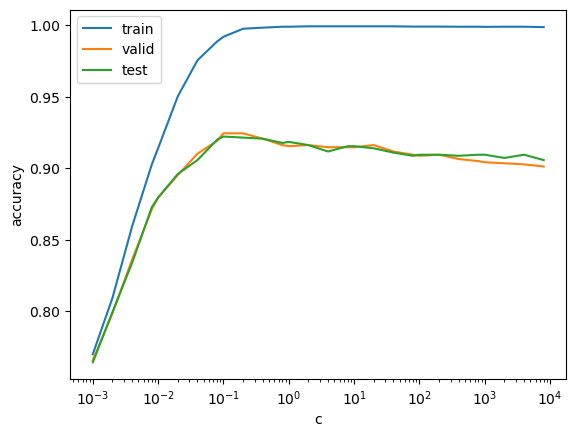

In [181]:
# グラフで表示
import matplotlib.pyplot as plt
df_acc_train = pd.DataFrame(accuracys[0], columns=['c', 'accuracy'])
df_acc_valid = pd.DataFrame(accuracys[1], columns=['c', 'accuracy'])
df_acc_test = pd.DataFrame(accuracys[2], columns=['c', 'accuracy'])
plt.plot(df_acc_train['c'], df_acc_train['accuracy'], label='train')
plt.plot(df_acc_valid['c'], df_acc_valid['accuracy'], label='valid')
plt.plot(df_acc_test['c'], df_acc_test['accuracy'], label='test')
plt.xscale('log')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend() # 各データのラベルを表示
plt.show()

<h2 id="59-ハイパーパラメータの探索">59. ハイパーパラメータの探索</h2>
<p>学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．</p>


In [179]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

# 3つのモデルで調査
classify_models = [LogisticRegression, SVC, LinearSVC]
# 各モデルのオブジェクトと正解率を格納するリスト
model_list = []
accuracys_list = []
# ココから学習
for cm in classify_models:
    model, accuracys = category_classify(cm, max_iter=5000)
    model_list.append(model)
    accuracys_list.append(accuracys)

/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

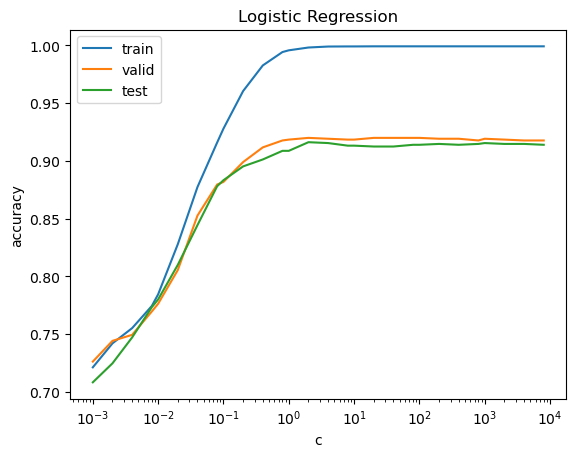

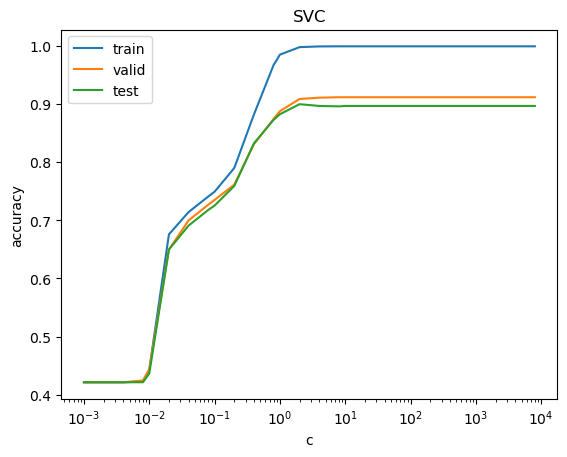

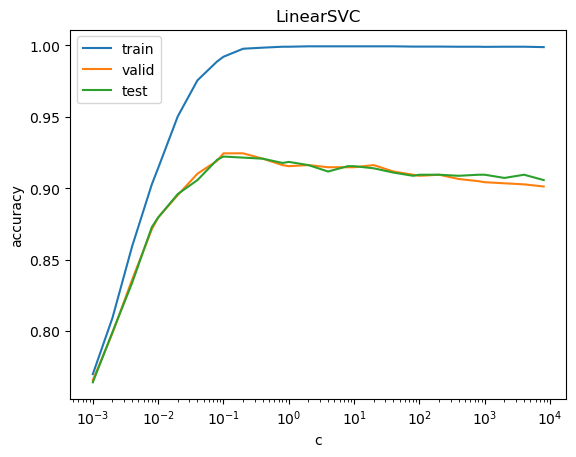

max_model : LinearSVC
max_c : 0.1
max_acc : 0.9244011976047904


In [180]:
titles = ['Logistic Regression', 'SVC', 'LinearSVC']
max_acc = 0
max_c = 0
max_model = ''

# それぞれのモデルでの評価データの正解率を表示
for i in range(3):
    df_acc_train = pd.DataFrame(accuracys_list[i][0], columns=['c', 'accuracy'])
    df_acc_valid = pd.DataFrame(accuracys_list[i][1], columns=['c', 'accuracy'])
    df_acc_test = pd.DataFrame(accuracys_list[i][2], columns=['c', 'accuracy'])
    
    # 正解率が一番高いモデルとパラメータを求める
    for temp_c, temp_acc in df_acc_valid.values:
        # 最大値の更新
        if max_acc < temp_acc:
            max_acc = temp_acc
            max_c = temp_c
            max_model = titles[i]
    
    # グラフ表示
    plt.plot(df_acc_train['c'], df_acc_train['accuracy'], label='train')
    plt.plot(df_acc_valid['c'], df_acc_valid['accuracy'], label='valid')
    plt.plot(df_acc_test['c'], df_acc_test['accuracy'], label='test')
    plt.title(titles[i])
    plt.xscale('log')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.legend() # 各データのラベルを表示
    plt.show()

# 正解率が最大のモデル、パラメータを表示
print(f'max_model : {max_model}')
print(f'max_c : {max_c}')
print(f'max_acc : {max_acc}')